In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
import re
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('country_populations.csv')
# we drop 2019 has NaN
df.drop(['2019'],axis=1,inplace=True)

cols = list(df.columns)
cols = cols[4:(len(cols))] # we leave only years

#df1 = df
#df1['var'] = df[cols].var(axis=1)
#df1 = df1.sort_values(by=['var'])
#df1.head(40)

In [3]:
country_name = 'Spain'

In [4]:
df = df.loc[df['Country Name']==country_name]
df.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
df = df.T
df.dropna(inplace=True)
df = df.reset_index()
df.rename({'index': 'year', df.columns[1]: 'population'}, axis=1, inplace=True)
max_value = df['population'].max()


In [5]:
df.columns

Index(['year', 'population'], dtype='object')

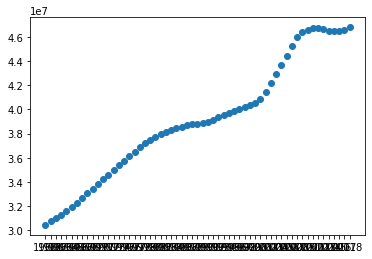

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['year'],df['population'])
plt.show()

In [7]:
max_value

46796540.0

In [8]:
tics = df['year'].values.tolist()


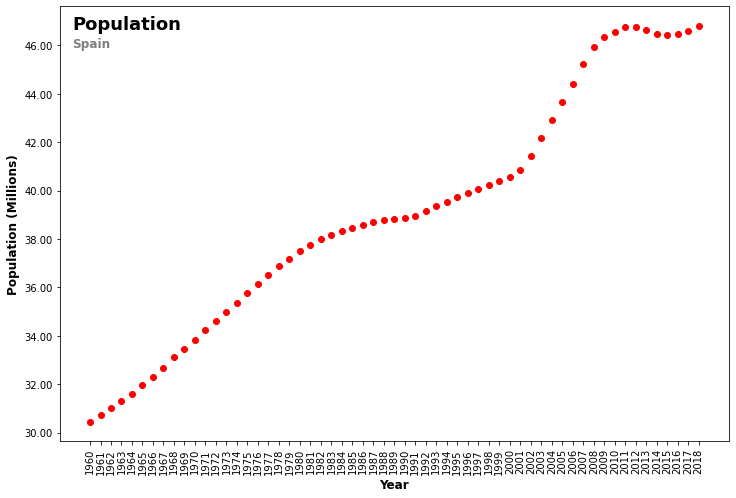

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Year",fontsize=12, fontweight='bold')
ax.set_ylabel("Population (Millions)",color="black",fontsize=12, fontweight='bold')

tics = df['year'].values.tolist()

plt.xticks(range(0, len(tics) ))
#ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xticklabels(tics, rotation = 90)

#fmt = lambda x,pos:'{:.0f}'.format(x/1000000, pos)

fmt = lambda x, pos: '{:.2f}'.format((x)/1000000, pos)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))
#ax.set_ylim([0,130000])

#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(fmt))

plt.scatter(df['year'],df['population'], color='red')
plt.figtext(0.14, 0.84, "Population", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, country_name, fontsize=12, color='grey',fontweight='bold')

plt.savefig('Population_'+country_name+'.jpg')
plt.show()

In [10]:
x = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)
model = LinearRegression().fit(x,y)

In [11]:
year = 2030
int(model.coef_[0][0] * year + model.intercept_[0])

50701007

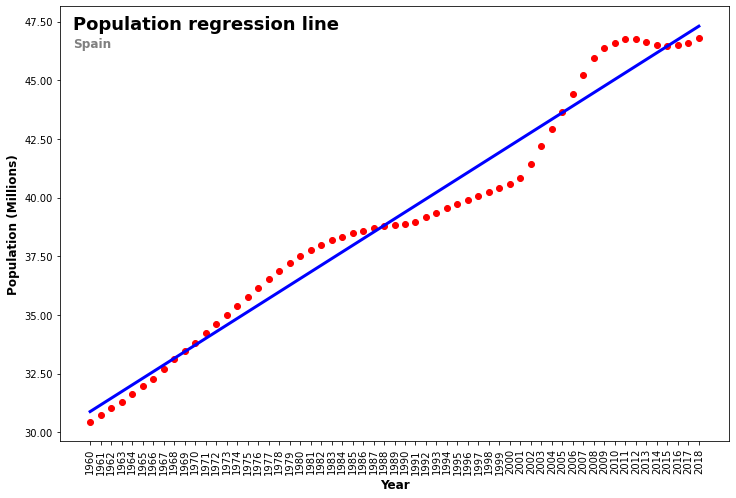

In [14]:
line_y = model.predict(x)
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Year",fontsize=12, fontweight='bold')
ax.set_ylabel("Population (Millions)",color="black",fontsize=12, fontweight='bold')

tics = df['year'].values.tolist()

plt.xticks(range(0, len(tics) ))
#ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xticklabels(tics, rotation = 90)

#fmt = lambda x,pos:'{:.0f}'.format(x/1000000, pos)

fmt = lambda x, pos: '{:.2f}'.format((x)/1000000, pos)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))
#ax.set_ylim([0,130000])

#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(fmt))

plt.scatter(df['year'],df['population'], color='red')
plt.plot(df['year'], line_y, color="blue", linewidth=3)
plt.figtext(0.14, 0.84, "Population regression line", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, country_name, fontsize=12, color='grey',fontweight='bold')

plt.savefig('Regression_'+country_name+'.jpg')
plt.show()